#### Import libraries

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Load the dataset

In [6]:
df = pd.read_csv('/Users/hpourmand/Desktop/All3/Coursera/Customer Shopping Trend/shopping.csv')

#### Segmentation by Purchase Frequency

Segment customers based on their Frequency of Purchases (e.g., "Weekly," "Annually"). Use this to understand different customer loyalty segments.

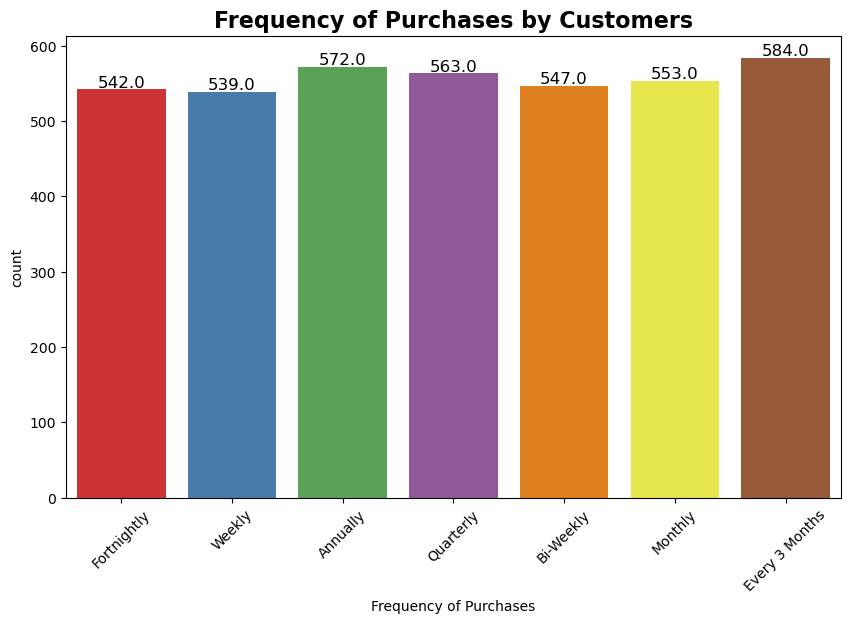

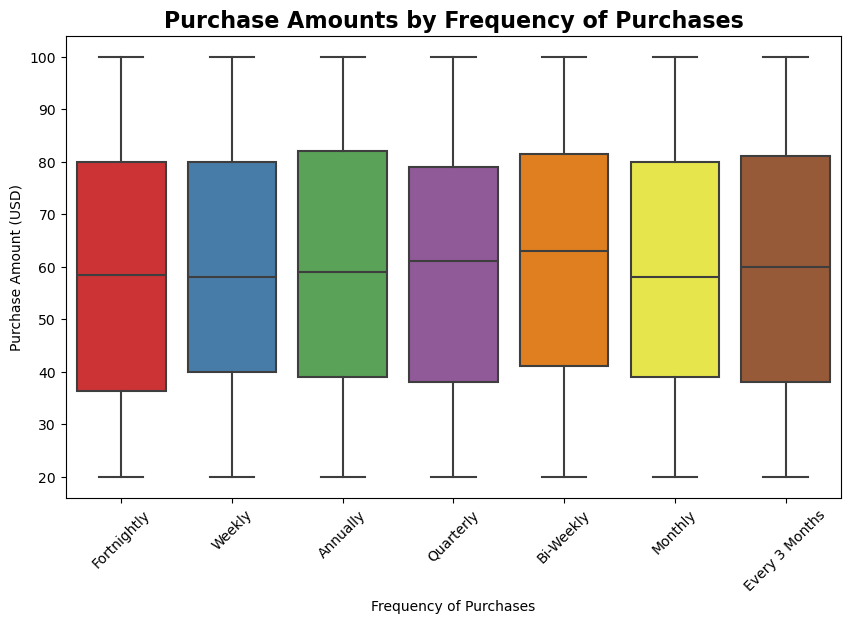

In [7]:
# Define our color palette
color_palette = sns.color_palette('Set1')

plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Frequency of Purchases', palette=color_palette)
plt.title('Frequency of Purchases by Customers', fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(False)  

# Annotate the counts on top of the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

# Box plot to see if purchase amounts vary by Frequency of Purchases
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df, x='Frequency of Purchases', y='Purchase Amount (USD)', palette=color_palette)
plt.title('Purchase Amounts by Frequency of Purchases', fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(False)  
plt.show()

#### RFM Segmentation (Frequency, Monetary)

For the moment, we skip recency. 

Frequency: We use the Previous Purchases column to categorize customers into low, medium, and high-frequency buyers.

Monetary: We use the Purchase Amount (USD) to segment based on how much each customer spends.

We use a combination of Frequency and Monetary to categorize customers into segments such as "high-value repeat customers," "new customers," and "at-risk customers."

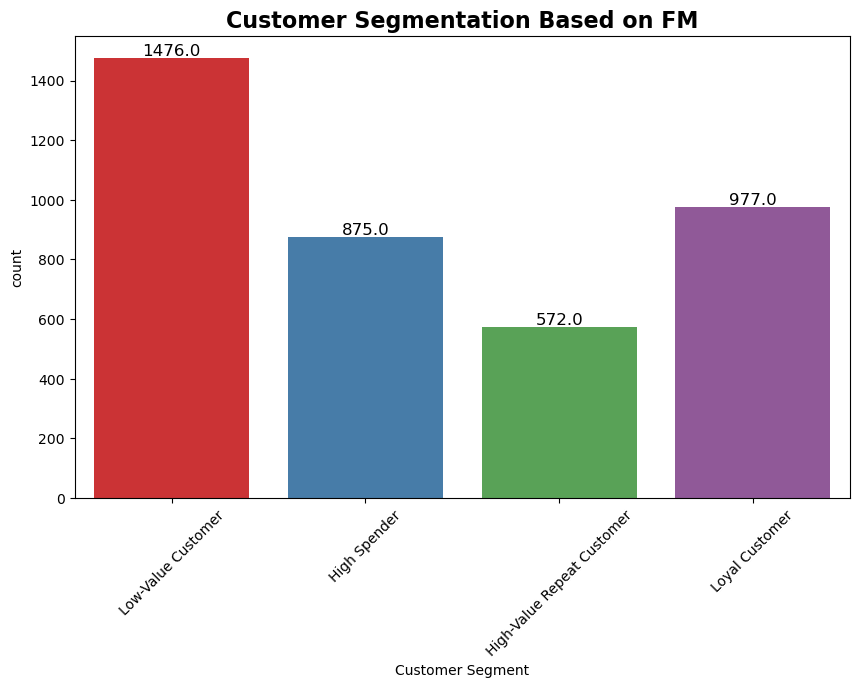

In [8]:
df['Monetary'] = df['Purchase Amount (USD)']
df['Frequency'] = df['Previous Purchases']

def fm_segmentation(row):
    if row['Frequency'] > 30 and row['Monetary'] > 70:
        return 'High-Value Repeat Customer'
    elif row['Frequency'] > 30:
        return 'Loyal Customer'
    elif row['Monetary'] > 70:
        return 'High Spender'
    else:
        return 'Low-Value Customer'

df['Customer Segment'] = df.apply(fm_segmentation, axis=1)

plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Customer Segment', palette=color_palette)
plt.title('Customer Segmentation Based on FM', fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(False)  

# Annotate the counts on top of the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

#### Promo Code and Discount Usage Segmentation

We analyze how the use of promo codes (Promo Code Used) and discounts (Discount Applied) affects purchasing behavior. So that, we create a segment of customers who frequently use promos/discounts vs. those who don’t and analyze differences in spending habits, review ratings, etc.

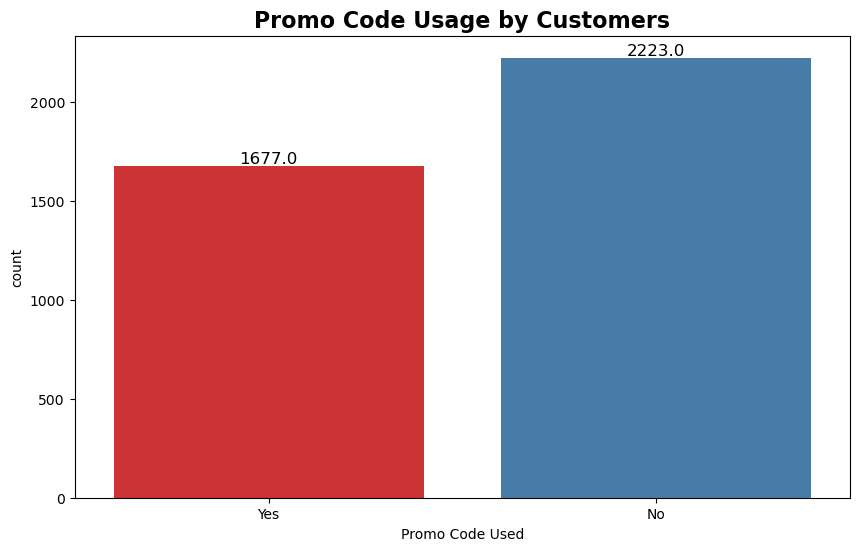

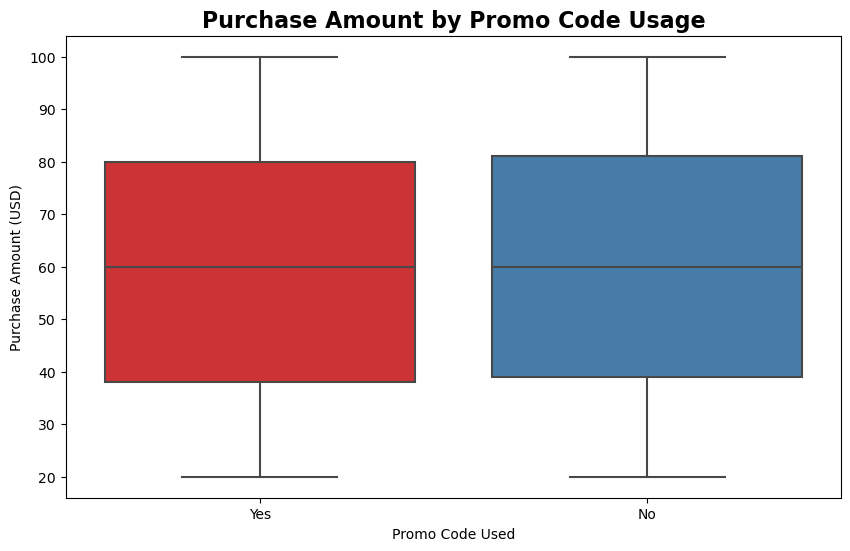

Discount Applied    No   Yes
Promo Code Used             
No                2223     0
Yes                  0  1677


In [9]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Promo Code Used', palette=color_palette)
plt.title('Promo Code Usage by Customers', fontsize=16, fontweight='bold')
plt.grid(False)  

# Annotate the counts on top of the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df, x='Promo Code Used', y='Purchase Amount (USD)', palette=color_palette)
plt.title('Purchase Amount by Promo Code Usage', fontsize=16, fontweight='bold')
plt.grid(False)  
plt.show()

# Cross-tabulation of Promo Code Usage with Discount Applied
promo_discount_ct = pd.crosstab(df['Promo Code Used'], df['Discount Applied'])
print(promo_discount_ct)

#### Subscription Status Segmentation



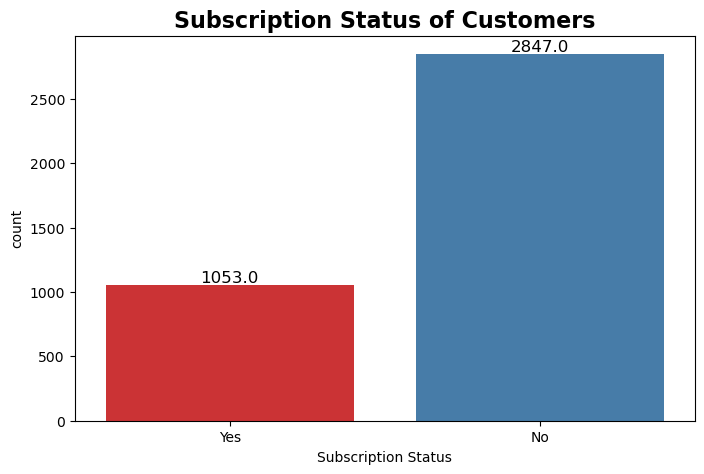

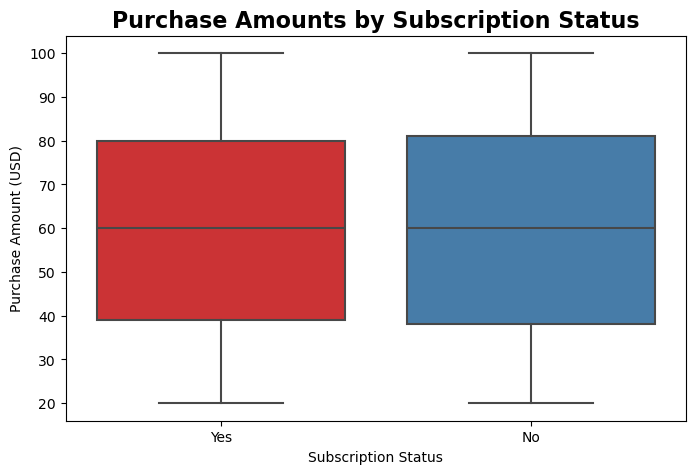

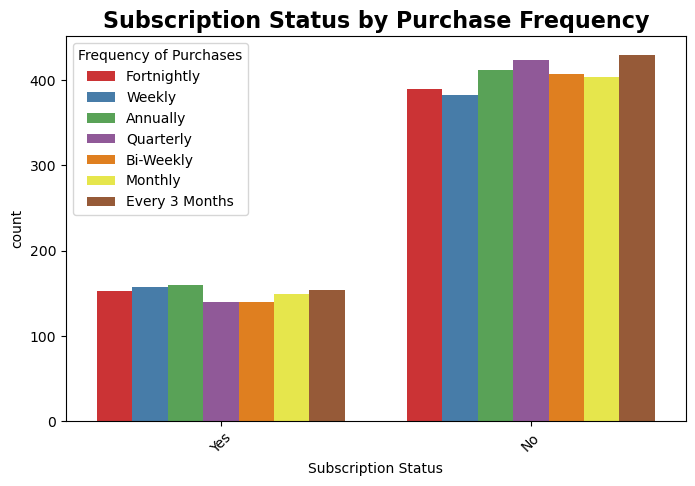

In [10]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, x='Subscription Status', palette=color_palette)
plt.title('Subscription Status of Customers', fontsize=16, fontweight='bold')
plt.grid(False)  # Remove grid lines

# Annotate the counts on top of the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

plt.figure(figsize=(8, 5))
ax = sns.boxplot(data=df, x='Subscription Status', y='Purchase Amount (USD)', palette=color_palette)
plt.title('Purchase Amounts by Subscription Status', fontsize=16, fontweight='bold')
plt.grid(False)  # Remove grid lines
plt.show()

plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, x='Subscription Status', hue='Frequency of Purchases', palette=color_palette)
plt.title('Subscription Status by Purchase Frequency', fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(False)  
plt.show()

#### Age Segmentation

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


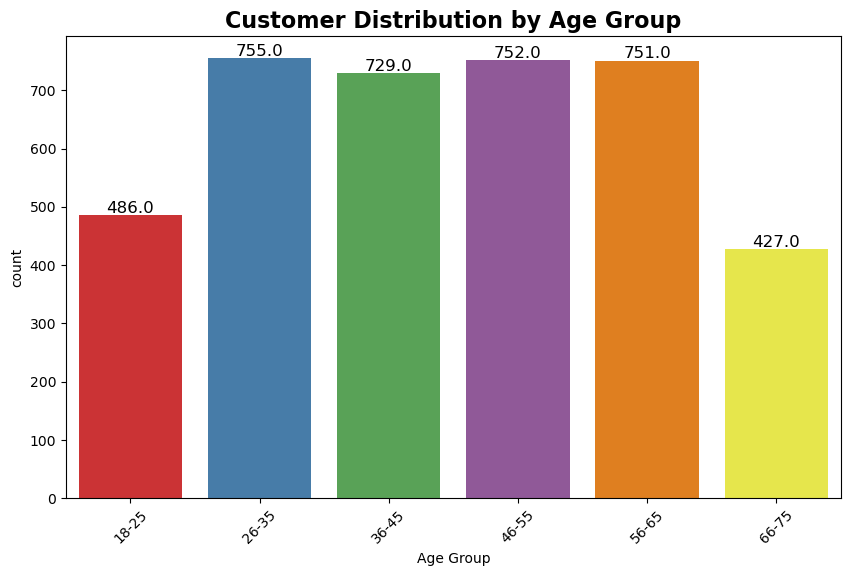

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


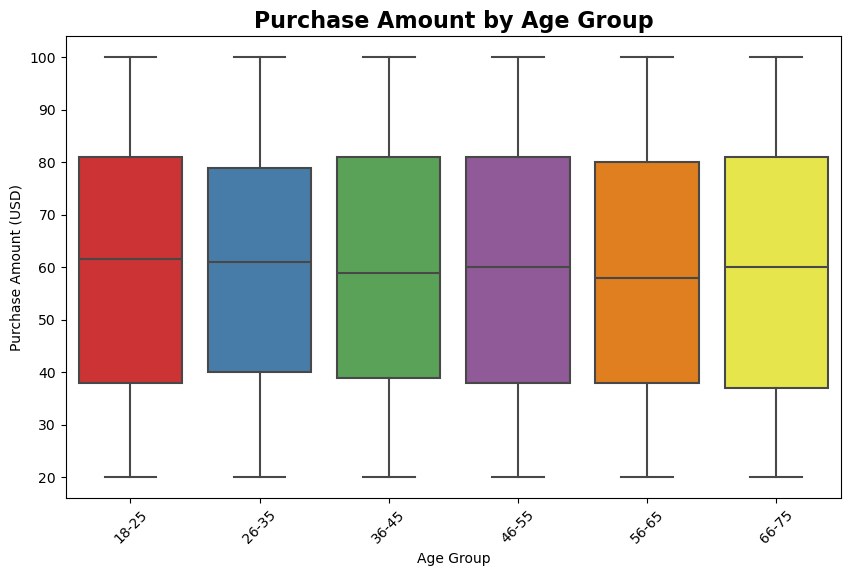

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


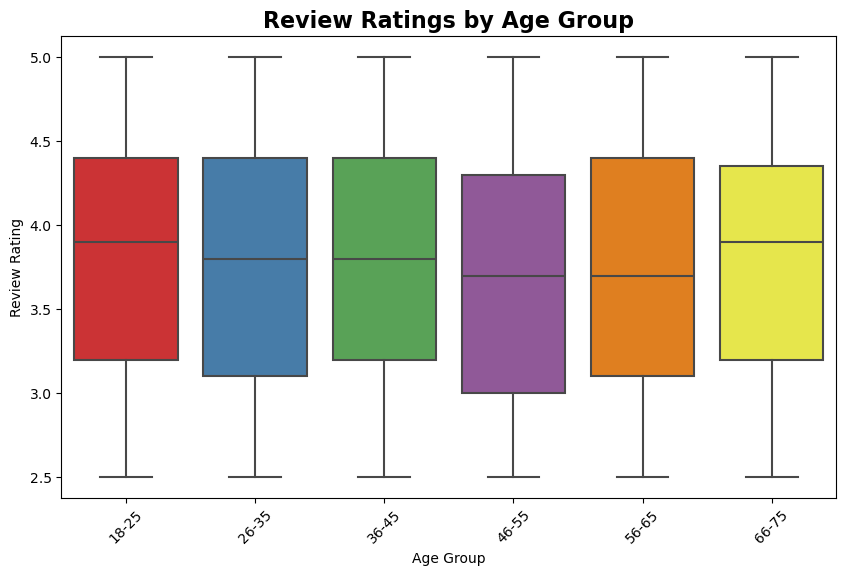

In [11]:
# Create age groups for segmentation
bins = [18, 25, 35, 45, 55, 65, 75]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66-75']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Age Group', palette=color_palette)
plt.title('Customer Distribution by Age Group', fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(False)  

# Annotate the counts on top of the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df, x='Age Group', y='Purchase Amount (USD)', palette=color_palette)
plt.title('Purchase Amount by Age Group', fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(False)  
plt.show()

plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df, x='Age Group', y='Review Rating', palette=color_palette)
plt.title('Review Ratings by Age Group', fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(False)  
plt.show()

#### Gender Analysis

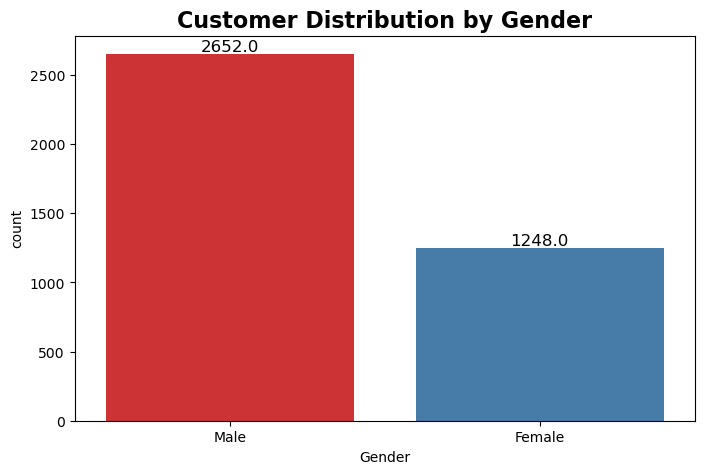

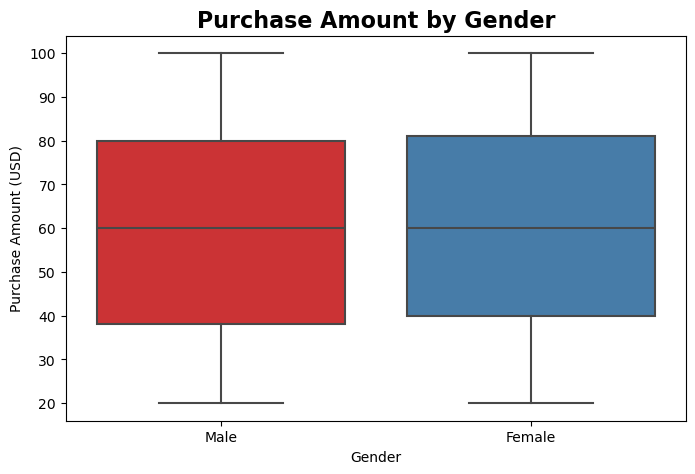

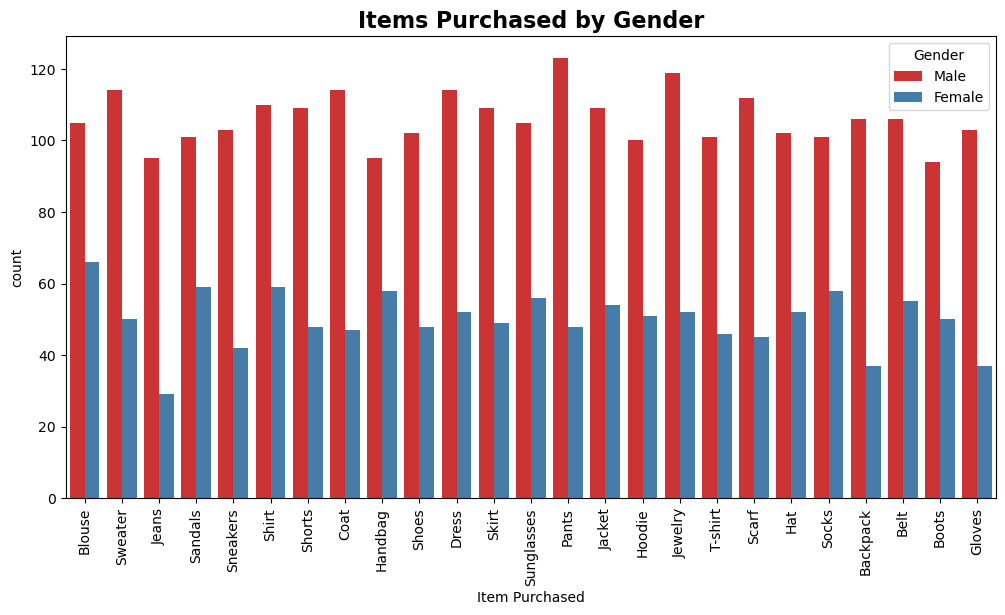

In [12]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, x='Gender', palette=color_palette)
plt.title('Customer Distribution by Gender', fontsize=16, fontweight='bold')
plt.grid(False)  

# Annotate the counts on top of the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

plt.figure(figsize=(8, 5))
ax = sns.boxplot(data=df, x='Gender', y='Purchase Amount (USD)', palette=color_palette)
plt.title('Purchase Amount by Gender', fontsize=16, fontweight='bold')
plt.grid(False)  # Remove grid lines
plt.show()

plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, x='Item Purchased', hue='Gender', palette=color_palette)
plt.title('Items Purchased by Gender', fontsize=16, fontweight='bold')
plt.xticks(rotation=90)
plt.grid(False)  
plt.show()